# Maximization bias

In [1]:
#######################################################################
# Copyright (C)                                                       #
# 2016-2018 Shangtong Zhang(zhangshangtong.cpp@gmail.com)             #
# 2016 Kenta Shimada(hyperkentakun@gmail.com)                         #
# Permission given to modify the code as long as you keep this        #
# declaration at the top                                              #
#######################################################################

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import copy

In [2]:
# state A
STATE_A = 0

# state B
STATE_B = 1

# use one terminal state
STATE_TERMINAL = 2

# starts from state A
STATE_START = STATE_A

# possible actions in A
ACTION_A_RIGHT = 0
ACTION_A_LEFT = 1

# probability for exploration
EPSILON = 0.1

# step size
ALPHA = 0.1

# discount for max value
GAMMA = 1.0

# possible actions in B, maybe 10 actions
ACTIONS_B = range(0, 10)

# all possible actions
STATE_ACTIONS = [[ACTION_A_RIGHT, ACTION_A_LEFT], ACTIONS_B]

# state action pair values, if a state is a terminal state, then the value is always 0
INITIAL_Q = [np.zeros(2), np.zeros(len(ACTIONS_B)), np.zeros(1)]

# set up destination for each state and each action
TRANSITION = [[STATE_TERMINAL, STATE_B], [STATE_TERMINAL] * len(ACTIONS_B)]

In [4]:
# choose an action based on epsilon greedy algorithm
def choose_action(state, q_value):
    if np.random.binomial(1, EPSILON) == 1:
        return np.random.choice(STATE_ACTIONS[state])
    else:
        values_ = q_value[state]
        return np.random.choice([action_ for action_, value_ in enumerate(values_) if value_ == np.max(values_)])

# take @action in @state, return the reward
def take_action(state, action):
    if state == STATE_A:
        return 0
    return np.random.normal(-0.1, 1)

# if there are two state action pair value array, use double Q-Learning
# otherwise use normal Q-Learning
def q_learning(q1, q2=None):
    state = STATE_START
    # track the # of action left in state A
    left_count = 0
    while state != STATE_TERMINAL:
        if q2 is None:
            action = choose_action(state, q1)
        else:
            # derive a action form Q1 and Q2
            action = choose_action(state, [item1 + item2 for item1, item2 in zip(q1, q2)])
        if state == STATE_A and action == ACTION_A_LEFT:
            left_count += 1
        reward = take_action(state, action)
        next_state = TRANSITION[state][action]
        if q2 is None:
            active_q = q1
            target = np.max(active_q[next_state])
        else:
            if np.random.binomial(1, 0.5) == 1:
                active_q = q1
                target_q = q2
            else:
                active_q = q2
                target_q = q1
            best_action = np.random.choice([action_ for action_, value_ in enumerate(active_q[next_state]) if value_ == np.max(active_q[next_state])])
            target = target_q[next_state][best_action]

        # Q-Learning update
        active_q[state][action] += ALPHA * (
            reward + GAMMA * target - active_q[state][action])
        state = next_state
    return left_count

100%|██████████| 1000/1000 [01:17<00:00, 12.96it/s]


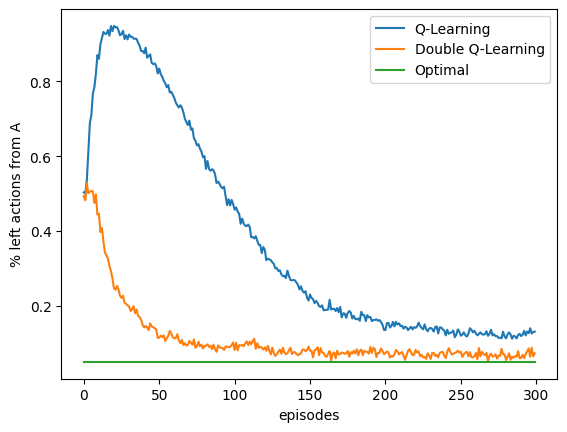

In [5]:
# Figure 6.7, 1,000 runs may be enough, # of actions in state B will also affect the curves
def figure_6_7():
    # each independent run has 300 episodes
    episodes = 300
    runs = 1000
    left_counts_q = np.zeros((runs, episodes))
    left_counts_double_q = np.zeros((runs, episodes))
    for run in tqdm(range(runs)):
        q = copy.deepcopy(INITIAL_Q)
        q1 = copy.deepcopy(INITIAL_Q)
        q2 = copy.deepcopy(INITIAL_Q)
        for ep in range(0, episodes):
            left_counts_q[run, ep] = q_learning(q)
            left_counts_double_q[run, ep] = q_learning(q1, q2)
    left_counts_q = left_counts_q.mean(axis=0)
    left_counts_double_q = left_counts_double_q.mean(axis=0)

    plt.plot(left_counts_q, label='Q-Learning')
    plt.plot(left_counts_double_q, label='Double Q-Learning')
    plt.plot(np.ones(episodes) * 0.05, label='Optimal')
    plt.xlabel('episodes')
    plt.ylabel('% left actions from A')
    plt.legend()

    plt.plot()

figure_6_7()